# Module Importation

In [5]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Data Loading for NN

In [6]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

# Show image

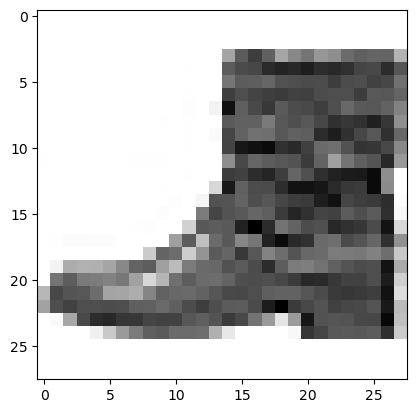

In [7]:
random_id=int(np.random.rand(1)[0]*len(x_train))
plt.imshow(x_train[random_id], cmap="Greys")
plt.show()

# Perceptron

In [8]:
x_train=x_train.reshape(x_train.shape[0],-1)/255.0
x_test=x_test.reshape(x_test.shape[0],-1)/255.0
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [9]:
model=Sequential([
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
    epochs=10, validation_split=0.1, batch_size=256)

Epoch 1/10


2025-10-21 14:45:47.926301: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6836 - loss: 0.9840 - val_accuracy: 0.8015 - val_loss: 0.6197
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8124 - loss: 0.5712 - val_accuracy: 0.8268 - val_loss: 0.5202
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8306 - loss: 0.5054 - val_accuracy: 0.8337 - val_loss: 0.4815
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.4728 - val_accuracy: 0.8377 - val_loss: 0.4630
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8455 - loss: 0.4525 - val_accuracy: 0.8468 - val_loss: 0.4408
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.4393 - val_accuracy: 0.8455 - val_loss: 0.4358
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8546 - loss: 0.4260 - val_accuracy: 0.8460 - val_loss: 0.4345
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8567 - loss: 0.4188 - val_accuracy: 0.8512 - val_

In [11]:
test_acc=model.evaluate(x_test, y_test)[1]
print(f"Accuracy on test set is {test_acc*100:.1f}%.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8454 - loss: 0.4434
Accuracy on test set is 84.5%.


# Data Loading for CNNs

In [12]:
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()
x_train=x_train[:,:,:,np.newaxis]/255.0
x_test=x_test[:,:,:,np.newaxis]/255.0
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# CNN

In [13]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import Input

In [14]:
model_cnn=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same',
        activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [15]:
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,770 (491.29 KB)

 Trainable params: 125,770 (491.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_cnn.fit(x_train, y_train,
    epochs=10, validation_split=0.1, batch_size=256)

Epoch 1/10


2025-10-21 14:45:58.063949: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


211/211 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.7984 - loss: 0.5939 - val_accuracy: 0.8550 - val_loss: 0.4105
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.8691 - loss: 0.3789 - val_accuracy: 0.8775 - val_loss: 0.3502
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.8815 - loss: 0.3395 - val_accuracy: 0.8787 - val_loss: 0.3404
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.8905 - loss: 0.3131 - val_accuracy: 0.8903 - val_loss: 0.3180
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.8948 - loss: 0.2996 - val_accuracy: 0.8920 - val_loss: 0.3079
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.8995 - loss: 0.2861 - val_accuracy: 0.8922 - val_loss: 0.3035
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.9019 - loss: 0.2755 - val_accuracy: 0.8933 - val_loss: 0.2987
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.9065 - loss: 0.2665 - val_accurac

In [18]:
test_acc_cnn=model_cnn.evaluate(x_test, y_test)[1]
print(f"Accuracy on test set is:\nNN: {test_acc*100:.1f}%.\nCNN: {test_acc_cnn*100:.1f}%.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8934 - loss: 0.3014
Accuracy on test set is:
NN: 84.5%.
CNN: 89.3%.


# Deeper CNN

In [19]:
model_cnn_deeper=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [20]:
model_cnn_deeper.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [21]:
model_cnn_deeper.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,234 (94.66 KB)

 Trainable params: 24,234 (94.66 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_cnn_deeper.fit(x_train,y_train,
    epochs=10, validation_split=0.1, batch_size=256)

Epoch 1/10


2025-10-21 14:48:19.507170: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.7504 - loss: 0.7365 - val_accuracy: 0.8283 - val_loss: 0.4601
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8507 - loss: 0.4249 - val_accuracy: 0.8542 - val_loss: 0.4004
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8681 - loss: 0.3784 - val_accuracy: 0.8697 - val_loss: 0.3665
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.8770 - loss: 0.3531 - val_accuracy: 0.8772 - val_loss: 0.3404
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.8840 - loss: 0.3299 - val_accuracy: 0.8763 - val_loss: 0.3491
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8891 - loss: 0.3176 - val_accuracy: 0.8847 - val_loss: 0.3244
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.8942 - loss: 0.3031 - val_accuracy: 0.8947 - val_loss: 0.3098
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8967 - loss: 0.2929 - val_accurac

In [23]:
dic_acc={
    "NN": test_acc,
    "CNN": test_acc_cnn,
}
dic_acc["CNN deeper"]=model_cnn_deeper.evaluate(x_test, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8889 - loss: 0.3132


In [24]:
def print_results_dic(dic_result):
    print("Accuracy on test set is:")
    for key, value in dic_result.items():
        print(f"{value*100:.1f}% : {key}")

In [25]:
print_results_dic(dic_acc)

Accuracy on test set is:
84.5% : NN
89.3% : CNN
88.9% : CNN deeper


# Add a Dense Layer

In [26]:
model_5=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
model_5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
model_5.fit(x_train,y_train,
    epochs=10, validation_split=0.1, batch_size=256)

Epoch 1/10


2025-10-21 14:51:24.571994: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.7254 - loss: 0.7885 - val_accuracy: 0.8022 - val_loss: 0.5200
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8369 - loss: 0.4569 - val_accuracy: 0.8538 - val_loss: 0.4162
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8610 - loss: 0.3931 - val_accuracy: 0.8588 - val_loss: 0.3889
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8700 - loss: 0.3650 - val_accuracy: 0.8702 - val_loss: 0.3603
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8804 - loss: 0.3379 - val_accuracy: 0.8795 - val_loss: 0.3375
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8868 - loss: 0.3202 - val_accuracy: 0.8850 - val_loss: 0.3242
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8914 - loss: 0.3056 - val_accuracy: 0.8877 - val_loss: 0.3164
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.8948 - loss: 0.2949 - val_accurac

In [28]:
dic_acc["CNN 2conv2D + 2Dense"]=model_5.evaluate(x_test, y_test)[1]
print_results_dic(dic_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8894 - loss: 0.3087
Accuracy on test set is:
84.5% : NN
89.3% : CNN
88.9% : CNN deeper
88.9% : CNN 2conv2D + 2Dense


# Drop out

In [ ]:
from keras.layers import Dropout
model_6=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model_6.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [33]:
model_6.fit(x_train,y_train,
    epochs=10, validation_split=0.1, batch_size=256)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 58s 269ms/step - accuracy: 0.6572 - loss: 1.0376 - val_accuracy: 0.7992 - val_loss: 0.6627
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.8037 - loss: 0.5593 - val_accuracy: 0.8570 - val_loss: 0.4189
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 54s 256ms/step - accuracy: 0.8627 - loss: 0.3855 - val_accuracy: 0.8727 - val_loss: 0.3529
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 54s 256ms/step - accuracy: 0.8767 - loss: 0.3426 - val_accuracy: 0.8785 - val_loss: 0.3309
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.8888 - loss: 0.3128 - val_accuracy: 0.8917 - val_loss: 0.3049
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 55s 258ms/step - accuracy: 0.8942 - loss: 0.2941 - val_accuracy: 0.8997 - val_loss: 0.2879
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 54s 258ms/step - accuracy: 0.9013 - loss: 0.2741 - val_accuracy: 0.9017 - val_loss: 0.2719
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.9056 - loss: 0

In [34]:
dic_acc["CNN 2*conv2D + 2*Dense + dropout"]=model_6.evaluate(x_test, y_test)[1]
print_results_dic(dic_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9062 - loss: 0.2584
Accuracy on test set is:
84.5% : NN
89.3% : CNN
88.9% : CNN deeper
88.9% : CNN 2conv2D + 2Dense
90.6% : CNN 2*conv2D + 2*Dense + dropout
